In [1]:
from decimal import Decimal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

In [2]:
class Account:
    """
    Account class maintain information and balance about each account
    ******Arguments******
    firstname:string
    lastname:string
    national id number:string with 10 numbers
    birthdate:string in the form of ##/##/####
    balance:integer greater than or equal to zero
    """
    accountNumber = 0
    accountsList = []

    def __init__(self, firstname, lastname,  national_id_number, birthdate, balance):
        self.firstname = firstname
        self.lastname = lastname
        self.national_id_number = national_id_number
        self.birthdate = birthdate
        self.balance = balance
        Account.accountNumber += 1
        self.account_number = Account.accountNumber
        self.stocks = {}  # {stock symbol: [shares, value]}
        Account.accountsList.append(self)

    def __str__(self):
        return f"{self.account_number}) {self.firstname:<9} {self.lastname:<9} Id:[{self.national_id_number}] " \
               f"  Birthdate:[{self.birthdate}]   Balance = {self.balance:,}"

    def buy_shares(self, stock, shares):
        """
        function to buy some shares from specific stock
        :param stock: Stock object
        :param shares: positive integer (representing Number of shares purchased)
        :return: string (Notify transaction completed successfully)
        """
        value = shares * stock.open_val
        if type(shares) != int:
            raise TypeError("Shares must be integer")
        elif shares > stock.shares_remain:
            raise ValueError(f"Shares value must be lower than remaining shares for stock ({stock.shares_remain})")
        elif shares < 1:
            raise ValueError("Shares must be positive integer")
        elif value > self.balance:
            raise ValueError("Not enough money for account to buy these shares")
        elif stock.symbol not in self.stocks:
            self.stocks[stock.symbol] = [shares, value]
        else:
            self.stocks[stock.symbol][0] += shares
            self.stocks[stock.symbol][1] += value
        self.balance = int(self.balance - value)
        stock.shares_remain -= shares
        return f"{self.firstname} {self.lastname} bought {shares} {stock.symbol} shares successfully"

    def sell_shares(self, stock, shares):
        """
        function to sell some shares from specific stock
        :param stock: Stock object
        :param shares: positive integer (representing Number of shares sold)
        :return: string (Notify transaction completed successfully)
        """
        sellValue = shares * stock.open_val
        cShares, cValue = self.stocks[stock.symbol]
        if stock.symbol not in self.stocks:
            raise ValueError("Account Doesn't have this stock")
        elif type(shares) != int:
            raise TypeError("Shares must be integer")
        elif shares < 1:
            raise ValueError("Shares must be positive integer")
        elif shares > cShares:
            raise ValueError(f"Not enough shares for account to sell ({cShares})")
        else:
            self.stocks[stock.symbol][0] -= shares
            self.stocks[stock.symbol][1] -= sellValue
        self.balance = int(self.balance + sellValue)
        stock.shares_remain += shares
        return f"{self.firstname} {self.lastname} sold {shares} {stock.symbol} shares successfully"

    def get_shares(self):
        """
        function to print shares that belongs to account
        :return: string (Total shares and values)
        """
        if not self.stocks:
            return f"{self.firstname} {self.lastname} doesn't have any share"
        counter = 0
        total_shares = 0
        total_value = 0
        print(f"{self.firstname} {self.lastname} shares:")
        for k, v in self.stocks.items():
            total_shares += v[0]
            total_value += v[1]
            counter += 1
            print(f"[{counter}] {k:<6} Shares:{v[0]:<7,}   Value = {v[1]:,.0f}")
        return f"Total shares:{total_shares:<7,}   Total value = {total_value:,.0f}"

    @property
    def firstname(self):
        return self.__firstname

    @firstname.setter
    def firstname(self, value):
        if type(value) != str:
            raise TypeError("Firstname must be string")
        elif not value.replace(" ", "").isalpha():
            raise ValueError("Firstname must be consists of only alphabetic characters")
        else:
            self.__firstname = value

    @property
    def lastname(self):
        return self.__lastname

    @lastname.setter
    def lastname(self, value):
        if type(value) != str:
            raise TypeError("Firstname must be string")
        elif not value.replace(" ", "").isalpha():
            raise ValueError("Lastname must be consists of only alphabetic characters")
        else:
            self.__lastname = value

    @property
    def national_id_number(self):
        return self.__national_id_number

    @national_id_number.setter
    def national_id_number(self, value):
        if type(value) != str:
            # I choose string because it is not possible to place 0 left side of the id numbers if they were integer
            raise TypeError("National id number must be string")
        elif len(value) != 10 or not value.isdigit():
            raise ValueError("National id number must be consists of 10 numbers")
        else:
            self.__national_id_number = value

    @property
    def birthdate(self):
        return self.__birthdate

    @birthdate.setter
    def birthdate(self, value):
        if type(value) != str:
            raise TypeError("Birthdate must be string")
        elif len(value) != 10 or not value.replace("/", "").isdigit() or not value[2] == value[5] == "/":
            raise ValueError("Birthdate must be in the form of ##/##/####, where each # is a digit")
        else:
            self.__birthdate = value

    @property
    def balance(self):
        return self.__balance

    @balance.setter
    def balance(self, value):
        if type(value) != int:
            raise TypeError("Balance must be integer")
        elif not value >= 0:
            raise ValueError("Balance must be greater than or equal to zero")
        else:
            self.__balance = Decimal(value)
            
def print_account_list():
    """
    Function to print all existing accounts
    """
    for account in Account.accountsList:
        print(account)

In [3]:
account1 = Account("Ali", "Ronaldo", "0045375980", "01/10/2000", 15000)
account2 = Account("majid", "messy", "0025328985", "10/16/2002", 10000)
print_account_list()

1) Ali       Ronaldo   Id:[0045375980]   Birthdate:[01/10/2000]   Balance = 15,000
2) majid     messy     Id:[0025328985]   Birthdate:[10/16/2002]   Balance = 10,000


In [4]:
class Stock:
    """
    Stock class maintain current information such as open, volume and number of shares about each company
    ******Arguments******
    symbol:string (abbreviation for company name)
    open val:float greater than zero (price for each stock that belongs to the company)
    volume:integer greater than zero (price for all of stocks that belongs to the company)
    date:string
    """
    companyNumber = 0
    stocksList = []

    def __init__(self, symbol, open_val, volume, date):
        self.symbol = symbol
        self.open_val = open_val
        self.volume = volume
        self.date = date
        self.shares = self.volume // self.open_val
        self.shares_remain = self.shares
        Stock.companyNumber += 1
        self.company_number = Stock.companyNumber
        Stock.stocksList.append(self)

    def __str__(self):
        return f"{self.company_number}) {self.symbol:<6} Open = {self.open_val:<11,.2f} Volume = {self.volume:<13,} " \
               f"Total shares:{self.shares:<7,}    Sold shares:{self.shares-self.shares_remain:<7,}  date:{self.date}"

    @property
    def symbol(self):
        return self.__symbol

    @symbol.setter
    def symbol(self, value):
        if type(value) != str:
            raise TypeError("symbol must be string")
        self.__symbol = value

    @property
    def open_val(self):
        return self.__open_val

    @open_val.setter
    def open_val(self, value):
        if type(value) != float:
            raise TypeError("Open value must be float")
        elif not value > 0:
            raise ValueError("Open value must be greater than zero")
        else:
            self.__open_val = Decimal(value)

    @property
    def volume(self):
        return self.__volume

    @volume.setter
    def volume(self, value):
        if type(value) != int:
            raise TypeError("Volume must be integer")
        elif not value > 0:
            raise ValueError("Volume must be greater than zero")
        else:
            self.__volume = Decimal(value)

    @property
    def date(self):
        return self.__date

    @date.setter
    def date(self, value):
        if type(value) != str:
            raise TypeError("Date must be string")
        self.__date = value
        
def print_stock_list():
    """
    Function to print all existing stocks
    """
    for stock in Stock.stocksList:
        print(stock)        

In [5]:
amazon = Stock("AMZN", 2181.3798828125, 4676700, "05/13/2022")
facebook = Stock("FB", 192.580001831054, 24523500, "05/13/2022")
tesla = Stock("TSLA", 773.47998046875, 30651800, "05/13/2022")
google = Stock("GOOGLE", 2290.65991210937, 1747900, "05/13/2022")
apple = Stock("AAPL", 144.58999633789, 113787000, "05/13/2022")

print_stock_list()

1) AMZN   Open = 2,181.38    Volume = 4,676,700     Total shares:2,143      Sold shares:0        date:05/13/2022
2) FB     Open = 192.58      Volume = 24,523,500    Total shares:127,341    Sold shares:0        date:05/13/2022
3) TSLA   Open = 773.48      Volume = 30,651,800    Total shares:39,628     Sold shares:0        date:05/13/2022
4) GOOGLE Open = 2,290.66    Volume = 1,747,900     Total shares:763        Sold shares:0        date:05/13/2022
5) AAPL   Open = 144.59      Volume = 113,787,000   Total shares:786,963    Sold shares:0        date:05/13/2022


In [6]:
print(account1)

1) Ali       Ronaldo   Id:[0045375980]   Birthdate:[01/10/2000]   Balance = 15,000


In [7]:
account1.buy_shares(apple, 10)

'Ali Ronaldo bought 10 AAPL shares successfully'

In [8]:
account1.buy_shares(facebook, 11)

'Ali Ronaldo bought 11 FB shares successfully'

In [9]:
account1.sell_shares(facebook, 2)

'Ali Ronaldo sold 2 FB shares successfully'

In [10]:
account1.buy_shares(apple, 5)

'Ali Ronaldo bought 5 AAPL shares successfully'

In [11]:
account1.get_shares()

Ali Ronaldo shares:
[1] AAPL   Shares:15        Value = 2,169
[2] FB     Shares:9         Value = 1,733


'Total shares:24        Total value = 3,902'

In [12]:
print(account1)

1) Ali       Ronaldo   Id:[0045375980]   Birthdate:[01/10/2000]   Balance = 11,097


In [13]:
print(apple)

5) AAPL   Open = 144.59      Volume = 113,787,000   Total shares:786,963    Sold shares:15       date:05/13/2022


In [14]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
df = pd.read_csv("stock_market_data.csv", parse_dates=["Date"],  index_col="Date")
df

,Symbol,Open,Volume
Date,,,
2009-12-31,AMZN,136.250000,7599900.0
2010-01-04,AMZN,136.250000,7599900.0
2010-01-05,AMZN,133.429993,8851900.0
2010-01-06,AMZN,134.600006,7178800.0
2010-01-07,AMZN,132.009995,11030200.0
2010-01-08,AMZN,130.559998,9830500.0
2010-01-11,AMZN,132.619995,8779400.0
2010-01-12,AMZN,128.990005,9096300.0
2010-01-13,AMZN,127.900002,10723200.0


In [15]:
df['pct-change-open']=df['Open'].pct_change(1)*100
df['pct-change-Volume']=df['Volume'].pct_change(1)*100
df

,Symbol,Open,Volume,pct-change-open,pct-change-Volume
Date,,,,,
2009-12-31,AMZN,136.250000,7599900.0,NaN,NaN
2010-01-04,AMZN,136.250000,7599900.0,0.000000,0.000000
2010-01-05,AMZN,133.429993,8851900.0,-2.069730,16.473901
2010-01-06,AMZN,134.600006,7178800.0,0.876874,-18.901027
2010-01-07,AMZN,132.009995,11030200.0,-1.924228,53.649635
2010-01-08,AMZN,130.559998,9830500.0,-1.098399,-10.876503
2010-01-11,AMZN,132.619995,8779400.0,1.577817,-10.692233
2010-01-12,AMZN,128.990005,9096300.0,-2.737136,3.609586
2010-01-13,AMZN,127.900002,10723200.0,-0.845030,17.885294


In [16]:
grouped = df.groupby(df.Symbol)
df_AMZN = grouped.get_group("AMZN")
df_FB = grouped.get_group("FB")
df_TSLA = grouped.get_group("TSLA")
df_GOOGL = grouped.get_group("GOOGL")
df_AAPL = grouped.get_group("AAPL")
df_AMZN

,Symbol,Open,Volume,pct-change-open,pct-change-Volume
Date,,,,,
2009-12-31,AMZN,136.250000,7599900.0,NaN,NaN
2010-01-04,AMZN,136.250000,7599900.0,0.000000,0.000000
2010-01-05,AMZN,133.429993,8851900.0,-2.069730,16.473901
2010-01-06,AMZN,134.600006,7178800.0,0.876874,-18.901027
2010-01-07,AMZN,132.009995,11030200.0,-1.924228,53.649635
2010-01-08,AMZN,130.559998,9830500.0,-1.098399,-10.876503
2010-01-11,AMZN,132.619995,8779400.0,1.577817,-10.692233
2010-01-12,AMZN,128.990005,9096300.0,-2.737136,3.609586
2010-01-13,AMZN,127.900002,10723200.0,-0.845030,17.885294


In [17]:
today = pd.concat([df_AMZN.iloc[-1:], df_FB.iloc[-1:], df_TSLA.iloc[-1:], df_GOOGL.iloc[-1:], df_AAPL.iloc[-1:]], axis=0)
today

,Symbol,Open,Volume,pct-change-open,pct-change-Volume
Date,,,,,
2022-05-13,AMZN,2181.379883,4676700.0,6.149873,-29.154863
2022-05-13,FB,192.580002,24523500.0,2.950927,-35.906717
2022-05-13,TSLA,773.479980,30651800.0,10.339512,-34.464091
2022-05-13,GOOGL,2290.659912,1747900.0,2.833151,-35.065755
2022-05-13,AAPL,144.589996,113787000.0,1.274772,-37.685787


In [18]:
today.sort_values(by=['pct-change-open'], ascending=False)

,Symbol,Open,Volume,pct-change-open,pct-change-Volume
Date,,,,,
2022-05-13,TSLA,773.479980,30651800.0,10.339512,-34.464091
2022-05-13,AMZN,2181.379883,4676700.0,6.149873,-29.154863
2022-05-13,FB,192.580002,24523500.0,2.950927,-35.906717
2022-05-13,GOOGL,2290.659912,1747900.0,2.833151,-35.065755
2022-05-13,AAPL,144.589996,113787000.0,1.274772,-37.685787


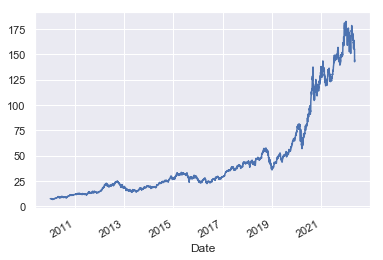

In [19]:
df_AAPL['Open'].plot()

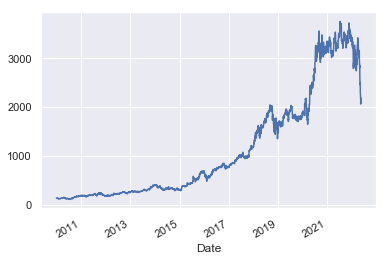

In [20]:
df_AMZN['Open'].plot()

D:\program files\Anaconda3 5.3.1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


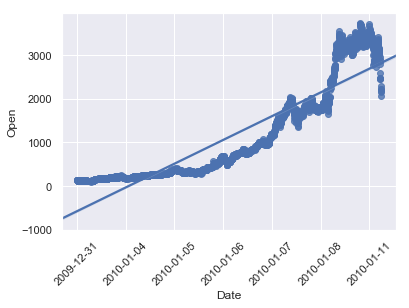

In [21]:
df_AMZN.insert(df.shape[1], 'row_count', df_AMZN.index.value_counts().sort_index().cumsum())
fig = sns.regplot(data = df_AMZN, x = 'row_count', y = 'Open')
# Change x-ticks to dates
labels = [item.get_text() for item in fig.get_xticklabels()]

# Set labels for 1:10 because labels has 11 elements (0 is the left edge, 11 is the right
# edge) but our data only has 9 elements
labels[1:10] = df_AMZN.index.date

# Set x-tick labels
fig.set_xticklabels(labels)

# Rotate the labels so you can read them
plt.xticks(rotation = 45)

# Change x-axis title
plt.xlabel('Date')

plt.show();